In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.9 MB/s eta 0:00:00


In [4]:
#importing all libraries
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
import os
import re
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objs as go
import itertools
from scipy import stats
from ast import literal_eval
import seaborn as sns

In [5]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Embedding, LSTM, Input, Activation, GlobalAveragePooling1D, Flatten, Concatenate, Conv1D, MaxPooling1D,Bidirectional,TimeDistributed
from tensorflow.keras.layers import BatchNormalization, concatenate
from keras.optimizers import SGD, RMSprop, Adagrad, Adam
from keras.preprocessing.text import one_hot, text_to_word_sequence, Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.callbacks import EarlyStopping, ModelCheckpoint

import fnmatch

import warnings

import string
from pathlib import Path
from random import shuffle
from ast import literal_eval

warnings.filterwarnings('ignore')

In [6]:
!pip install nltk
import nltk

In [7]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.stem.wordnet import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
import gensim
import json


import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
import keras.utils
from keras import utils as np_utils

#Keras Tokenizer just replaces certain punctuation characters and splits on the remaining space character.
#NLTK Tokenizer uses the Treebank tokenizer uses regular expressions to tokenize text as in Penn Treebank.

In [9]:
WINDOWS_SIZE = 10
labels=['none','mild','moderate','moderately severe', 'severe']
num_classes = len(labels)

In [10]:
# def transcripts_to_dataframe(directory):
#     rows_list = []

#     filenames = os.listdir(directory)

#     if ".DS_Store" in filenames:
#         filenames.remove(".DS_Store")

#     for filename in filenames:
#         transcript_path = os.path.join(directory, filename)
#         transcript = pd.read_csv(transcript_path, sep='\t')
#         m = re.search("(\d{3})_TRANSCRIPT.csv", filename)
#         if m:
#             person_id = m.group(1)
#             p = {}
#             question = ""
#             answer = ""
#             lines = len(transcript)
#             for i in range(0, lines):
#                 row = transcript.iloc[i]
#                 if (row["speaker"] == "Ellie") or (i == lines - 1):
#                     p["personId"] = person_id
#                     if "(" in str(question):
#                         question = question[question.index("(") + 1:question.index(")")]
#                     p["question"] = question
#                     p["answer"] = answer
#                     if question != "":
#                         rows_list.append(p)
#                     p = {}
#                     answer = ""
#                     question = row["value"]
#                 else:
#                     answer = str(answer) + " " + str(row["value"])

#     all_participants = pd.DataFrame(rows_list, columns=['personId', 'question', 'answer'])
#     all_participants.to_csv(directory + 'all.csv', sep=',')
#     print("File was created")
#     return all_participants

    #converting the transcript files into a dataframe
def transcripts_to_dataframe(directory):
    rows_list = []
    folders = [f for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]
    for folder in folders:
      folder_path = os.path.join(directory, folder)
      filenames = [f for f in os.listdir(folder_path) if f.lower().endswith('.csv')]

      if ".DS_Store" in filenames:
        filenames.remove(".DS_Store")

      for filename in filenames:
        transcript_path = os.path.join(folder_path, filename)
        transcript = pd.read_csv(transcript_path,encoding='utf-8', sep='\t')
        m = re.search("(\d{3})_TRANSCRIPT.csv", filename)
        if m:
            person_id = m.group(1)
            p = {}
            question = ""
            answer = ""
            lines = len(transcript)
            for i in range(0, lines):
                row = transcript.iloc[i]
                if (row["speaker"] == "Ellie") or (i == lines - 1):
                    p["personId"] = person_id
                    if "(" in str(question):
                        question = question[question.index("(") + 1:question.index(")")]
                    p["question"] = question
                    p["answer"] = answer
                    if question != "":
                        rows_list.append(p)
                    p = {}
                    answer = ""
                    question = row["value"]
                else:
                    answer = str(answer) + " " + str(row["value"])

    all_participants = pd.DataFrame(rows_list, columns=['personId', 'question', 'answer'])
    all_participants.to_csv(directory + 'all.csv', sep=',')
    print("File was created")
    return all_participants

In [11]:
#loading the data
#https://drive.google.com/drive/folders/1P4jTobE17ZPG-oKrDfIDdKtRrnngvZxE?usp=share_link
data_path = "/content/drive/My Drive/data/"
# data_path = "https://drive.google.com/drive/folders/1P4jTobE17ZPG-oKrDfIDdKtRrnngvZxE?usp=share_link"
all_participants = transcripts_to_dataframe(data_path)

File was created


In [12]:
all_participants.head(20)

,personId,question,answer
0,487,hi i'm ellie thanks for coming in today i was ...,yes
1,487,okay,
2,487,so how are you doing today,i'm fine thank you
3,487,that's good,
4,487,where are you from originally,detroit michigan
5,487,really,yes
6,487,when did you move to l_a,i moved to l_a myself in two thousand and sev...
7,487,mm,
8,487,how often do you go back to your hometown,uh i don't go back to detroit anymore
9,487,why,i really don't like the weather and i really ...


In [13]:
#https://www.kaggle.com/currie32/the-importance-of-cleaning-text

def text_to_wordlist(text, remove_stopwords=True, stem_words=False):
    # Clean the text, with the option to remove stopwords and to stem words.

    # Convert words to lower case and split them
    text = text.lower().split()

    # Optionally, remove stop words
    if remove_stopwords:
        stops = stopwords.words("english")
        text = [wordnet_lemmatizer.lemmatize(w) for w in text if not w in stops ]
        text = [w for w in text if w != "nan" ]
    else:
        text = [wordnet_lemmatizer.lemmatize(w) for w in text]
        text = [w for w in text if w != "nan" ]

    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"\<", " ", text)
    text = re.sub(r"\>", " ", text)

    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)

    # Return a list of words
    return(text)

In [16]:
# #creating a corpus with the words from the answers without stopwords given by the patients
all_participants_mix = all_participants.copy() # However, if you need the original list unchanged when the new list is modified, you can use copy() method. This is called shallow copy.
# all_participants_mix['answer'] = all_participants_mix.apply(lambda row: text_to_wordlist(row.answer).split(), axis=1)

In [17]:
# Update the 'question' column with the processed words
all_participants_mix['question'] = all_participants_mix.apply(
    lambda row: text_to_wordlist(row.question).split() if pd.notnull(row['question']) else [], axis=1
)
# all_participants_mix['answer'] = all_participants_mix.apply(lambda row: text_to_wordlist(row.answer).split(), axis=1)
# Update the 'answer' column with the processed words
all_participants_mix['answer'] = all_participants_mix.apply(
    lambda row: text_to_wordlist(row.answer).split() if pd.notnull(row['answer']) else [], axis=1
)

In [18]:
all_participants_mix

,personId,question,answer
0,487,"[hi, i, am, ellie, thanks, coming, today, crea...",[yes]
1,487,[okay],[]
2,487,[today],"[i, am, fine, thank]"
3,487,"[that, good]",[]
4,487,[originally],"[detroit, michigan]"
...,...,...,...
14898,303,[yeah],[]
14899,303,"[that, good, hear]",[thank]
14900,303,"[okay, think, i, have, asked, everything, need]",[]
14901,303,"[thanks, sharing, thought]","[welcome, good, day]"


In [19]:
##creating a corpus with the words from the answers withstopwords given by the patients
# stopwords are ={what is , have,}
all_participants_mix_stopwords = all_participants.copy()
all_participants_mix_stopwords['answer'] = all_participants_mix_stopwords.apply(lambda row: text_to_wordlist(row.answer, remove_stopwords=False).split(), axis=1)
all_participants_mix_stopwords['question'] = all_participants_mix_stopwords.apply(
    lambda row: text_to_wordlist(row.question,remove_stopwords = False).split() if pd.notnull(row['question']) else [], axis=1
)


In [20]:
all_participants_mix_stopwords

,personId,question,answer
0,487,"[hi, i, am, ellie, thanks, for, coming, in, to...",[yes]
1,487,[okay],[]
2,487,"[so, how, are, you, doing, today]","[i, am, fine, thank, you]"
3,487,"[that, good]",[]
4,487,"[where, are, you, from, originally]","[detroit, michigan]"
...,...,...,...
14898,303,[yeah],[]
14899,303,"[that, so, good, to, hear]","[thank, you]"
14900,303,"[okay, i, think, i, have, asked, everything, i...",[]
14901,303,"[thanks, for, sharing, your, thought, with, me]","[you, are, more, than, welcome, you, have, a, ..."


In [21]:
words = [w for w in all_participants_mix['answer'].tolist()]
words = set(itertools.chain(*words)) #chain('ABC', 'DEF') --> A B C D E F
vocab_size = len(words)

In [22]:
words_q = [w for w in all_participants_mix['question'].tolist()]
words_q = set(itertools.chain(*words_q)) #chain('ABC', 'DEF') --> A B C D E F
vocab_size_q = len(words_q)

In [23]:
vocab_size

7345

In [24]:
words

{'conform',
 'insightful',
 'handsome',
 'photography',
 'kinda',
 'extreme',
 'filing',
 'dividing',
 'salton',
 'previously',
 'determination',
 'midwifery',
 'maintaining',
 'amount',
 'cross',
 'midwest',
 'composition',
 'warehouse',
 'speed',
 'barbecued',
 'rest',
 'battle',
 'avoidance',
 'saint',
 'considered',
 'remind',
 'comme',
 'violent',
 'satisfaction',
 'daughter',
 'intricate',
 'note',
 'remedied',
 'bipolar',
 'disfigurement',
 'gossip',
 'temple',
 'offensive',
 'communit',
 'wasted',
 'initial',
 'laguna',
 'ambivalence',
 'specialist',
 'superbowl',
 'whatever',
 'soldier',
 'describe',
 'vaguely',
 'trap',
 'prior',
 'line',
 'contact',
 'government',
 'breakthrough',
 'behoove',
 'holistic',
 'racist',
 'career',
 'homeless',
 'ritual',
 'bitchy',
 'shittiest',
 'ds',
 'kidnapped',
 'management',
 'england',
 'rand',
 'dependable',
 'zone',
 'eliminate',
 'doodling',
 'spray',
 'nurturing',
 'disorder',
 'mentality',
 'continuous',
 'loud',
 'impulsive',
 'stri

In [25]:
vocab_size_q

271

In [26]:
words_q

{'-',
 'a',
 'advice',
 'affected',
 'ago',
 'almost',
 'always',
 'am',
 'annoyed',
 'answer',
 'anything',
 'argued',
 'ask',
 'asked',
 'asks',
 'assistant',
 'avoid',
 'aw',
 'awesome',
 'aww',
 'back',
 'badly',
 'behavior',
 'best',
 'cannot',
 'change',
 'chatting',
 'civilian',
 'close',
 'combat',
 'come',
 'coming',
 'compare',
 'computer',
 'confidential',
 'consider',
 'controlling',
 'cool',
 'cope',
 'could',
 'created',
 'd',
 'day',
 'decide',
 'decision',
 'depression',
 'describe',
 'diagnosed',
 'different',
 'differently',
 'disturbing',
 'done',
 'dream',
 'easy',
 'ellie',
 'enjoy',
 'enjoyed',
 'enlist',
 'environment',
 'erase',
 'event',
 'ever',
 'everything',
 'example',
 'experience',
 'explorer',
 'family',
 'feel',
 'feeling',
 'felt',
 'find',
 'fish',
 'found',
 'free',
 'friend',
 'fun',
 'get',
 'give',
 'go',
 'going',
 'good',
 'goodbye',
 'gosh',
 'got',
 'gotten',
 'great',
 'guilty',
 'handled',
 'happened',
 'happy',
 'hard',
 'hardest',
 'have',

In [27]:
words_stop = [w for w in all_participants_mix_stopwords['answer'].tolist()]
words_stop = set(itertools.chain(*words_stop))
vocab_size_stop = len(words_stop)

In [28]:
vocab_size_stop

7421

In [29]:
words_stop

{'conform',
 'insightful',
 'handsome',
 'photography',
 'kinda',
 'extreme',
 'filing',
 'dividing',
 'salton',
 'previously',
 'determination',
 'midwifery',
 'maintaining',
 'amount',
 'cross',
 'midwest',
 'composition',
 'warehouse',
 'speed',
 'barbecued',
 'rest',
 'battle',
 'avoidance',
 'saint',
 'considered',
 'remind',
 'comme',
 'violent',
 'satisfaction',
 'daughter',
 'intricate',
 'note',
 'remedied',
 'bipolar',
 'disfigurement',
 'gossip',
 'temple',
 'offensive',
 'communit',
 'wasted',
 'initial',
 'laguna',
 'ambivalence',
 'specialist',
 'superbowl',
 'whatever',
 'soldier',
 'describe',
 'vaguely',
 'trap',
 'prior',
 'line',
 'contact',
 'government',
 'breakthrough',
 'behoove',
 'holistic',
 'racist',
 'career',
 'homeless',
 'ritual',
 'bitchy',
 'shittiest',
 'ds',
 'kidnapped',
 'management',
 'england',
 'rand',
 'dependable',
 'zone',
 'eliminate',
 'doodling',
 'spray',
 'nurturing',
 'disorder',
 'mentality',
 'continuous',
 'loud',
 'impulsive',
 'stri

In [30]:
words_stop_q = [w for w in all_participants_mix_stopwords['question'].tolist()]
words_stop_q = set(itertools.chain(*words_stop_q))
vocab_size_stop_q = len(words_stop_q)

In [31]:
vocab_size_stop_q

331

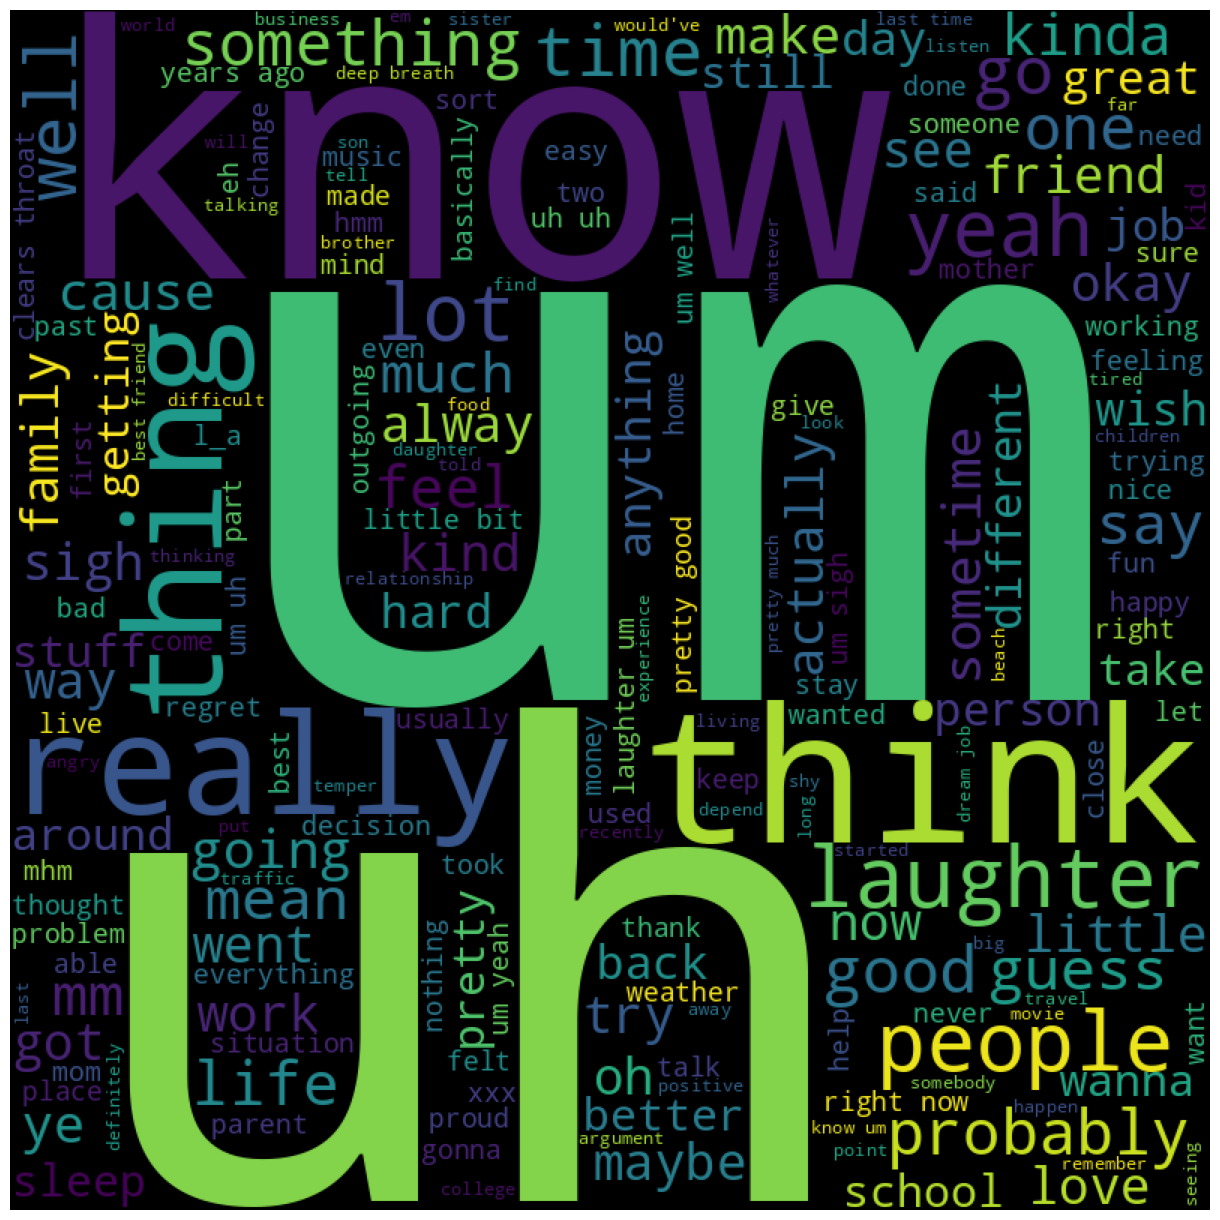

In [32]:
#wordcloud used to represent the important words based on frequency

# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ' '
stopwords = set(STOPWORDS)

# iterate through the csv mifile
for val in all_participants['answer'].values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    for words in tokens:
        comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

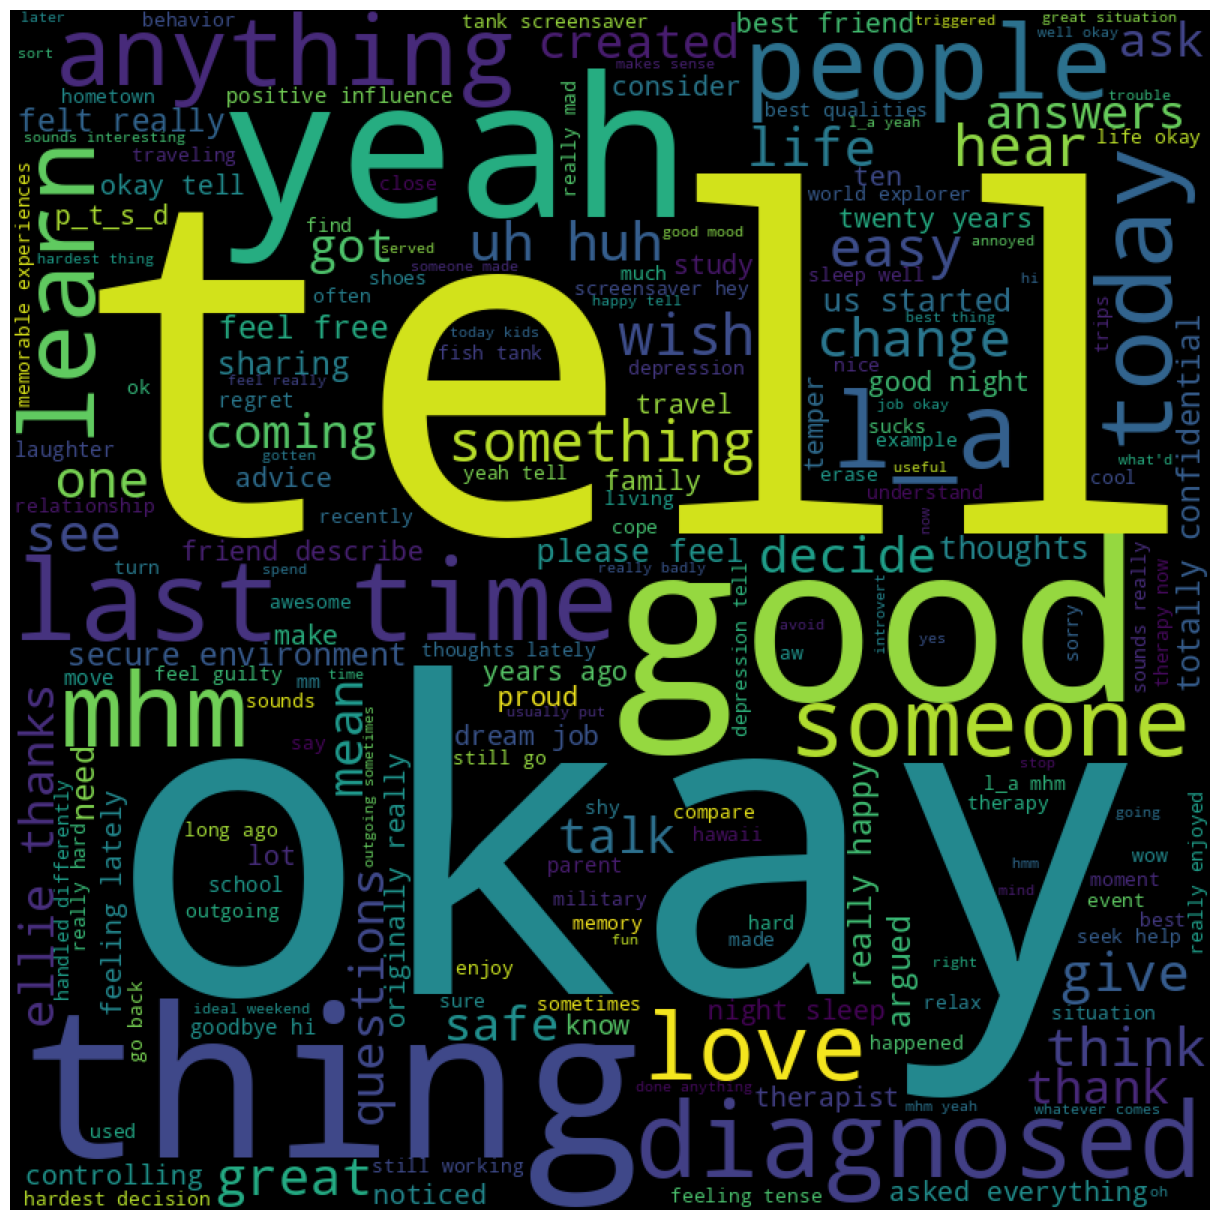

In [33]:
#wordcloud used to represent the important words based on frequency about the question that them ask patient

# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ' '
stopwords = set(STOPWORDS)

# iterate through the csv mifile
for val in all_participants['question'].values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    for words in tokens:
        comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Unigram of the top 20 frequent words

um 6990
uh 5335
know 3548
like 3455
just 3142
don 1922
really 1768
laughter 1482
yeah 1274
ve 1266
think 1224
people 1159
good 1107
things 1043
lot 911
time 884
pretty 713
sigh 641
probably 626
little 588
life 586
feel 565
mm 558
guess 549
say 549
years 525
mean 523
different 496
yes 490
going 487
kinda 484
oh 447
didn 437
right 435
cause 429
went 403
hard 397
got 393
work 389
ago 387


<Axes: title={'center': 'Top 20 words in review after removing stop words'}, xlabel='Text'>

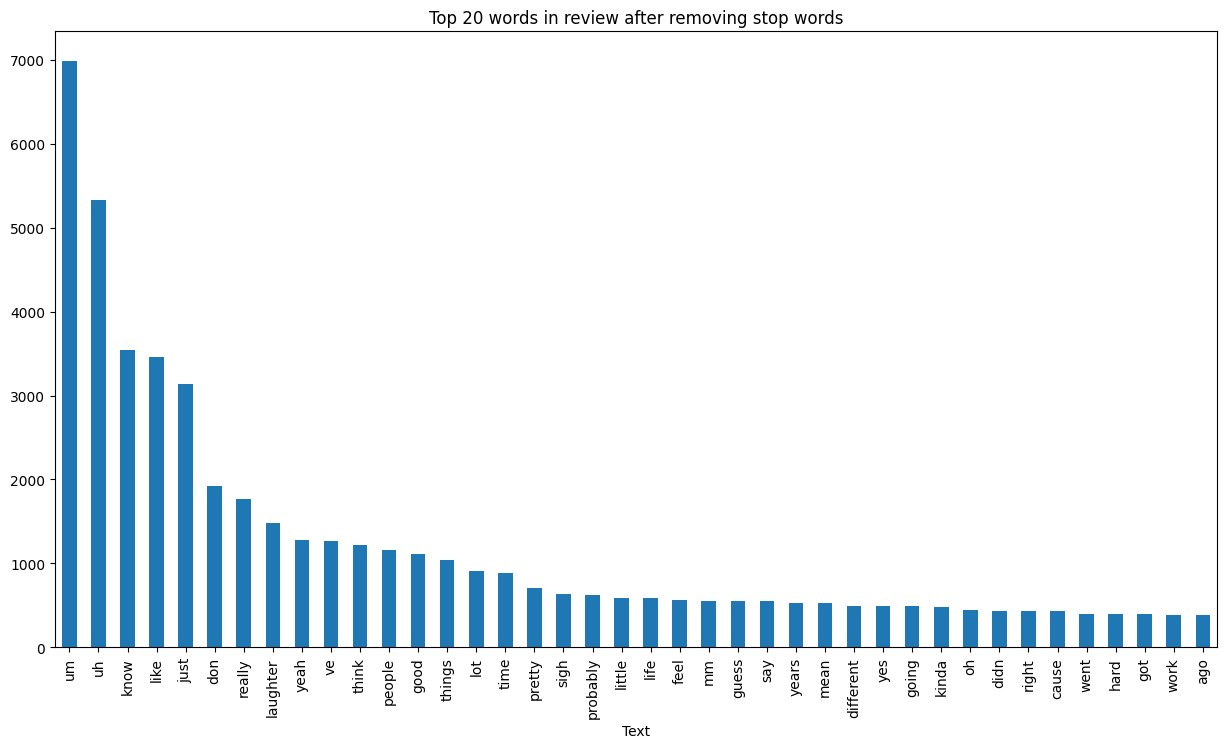

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
#The distribution of top unigrams

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(all_participants['answer'].dropna(), 40)

for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review after removing stop words',figsize=(15,8))

tell 1393
okay 1309
really 981
good 832
yeah 706
like 679
did 678
l_a 590
mhm 548
things 548
feel 524
time 504
best 424
today 404
diagnosed 398
thanks 393
people 371
learn 370
life 350
great 327
thoughts 326
ve 325
love 322
wish 312
hear 304
sleep 303
don 295
lately 294
easy 292
uh 285
feeling 282
huh 274
think 257
ago 247
happy 244
decide 214
talk 210
mean 207
hard 207
therapist 206


<Axes: title={'center': 'Top 20 words in review after removing stop words'}, xlabel='Text'>

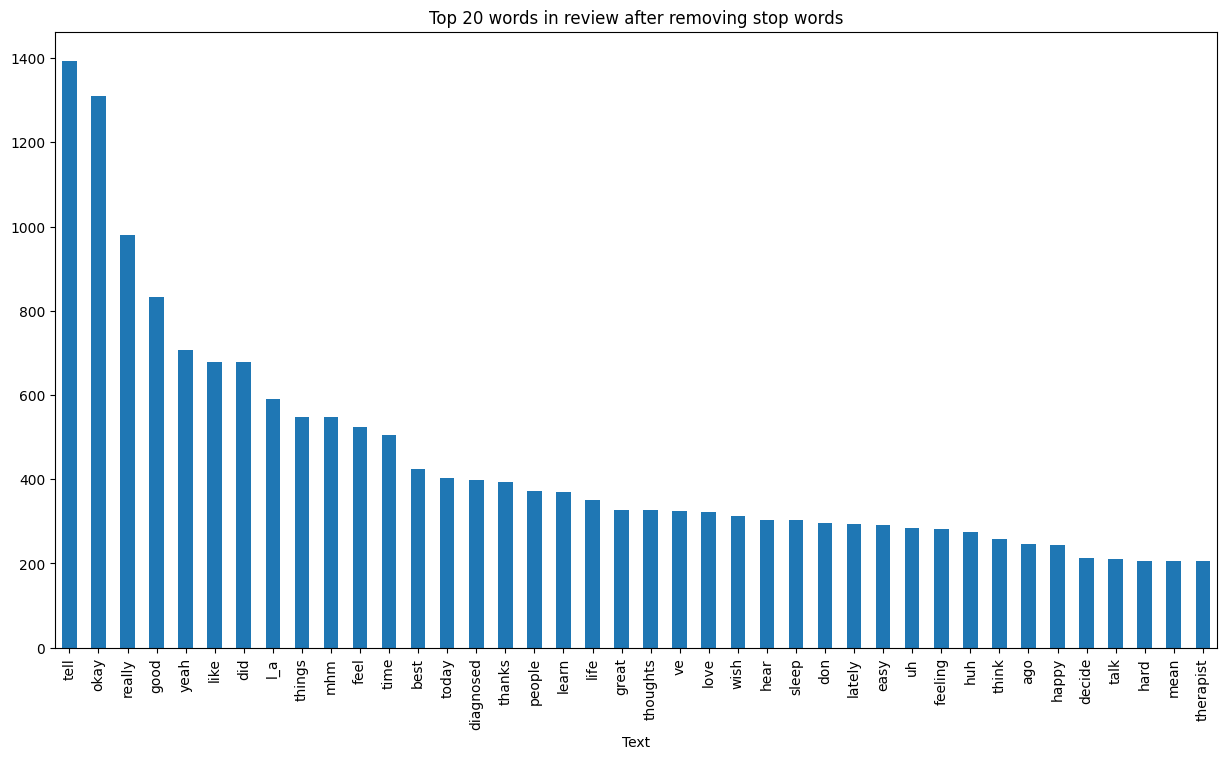

In [35]:
question_words = get_top_n_words(all_participants['question'].dropna(), 40)

for word, freq in question_words:
    print(word, freq)
df2 = pd.DataFrame(question_words, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review after removing stop words',figsize=(15,8))

### Bigram of the top 20 frequent words

don know 596
um just 306
um uh 284
um know 252
uh uh 245
know just 223
years ago 213
um don 212
little bit 203
pretty good 179
just like 172
uh just 168
um like 168
feel like 168
uh know 164
don really 164
um sigh 143
know like 143
clears throat 143
um yeah 142
um think 138
um um 137
know um 134
don like 126
uh don 124
just uh 124
deep breath 122
um really 120
laughter um 119
like know 118
uh like 117
know uh 113
like um 113
things like 111
uh um 107
um probably 106
don think 103
like uh 102
just know 101
um ve 101


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='Text'>

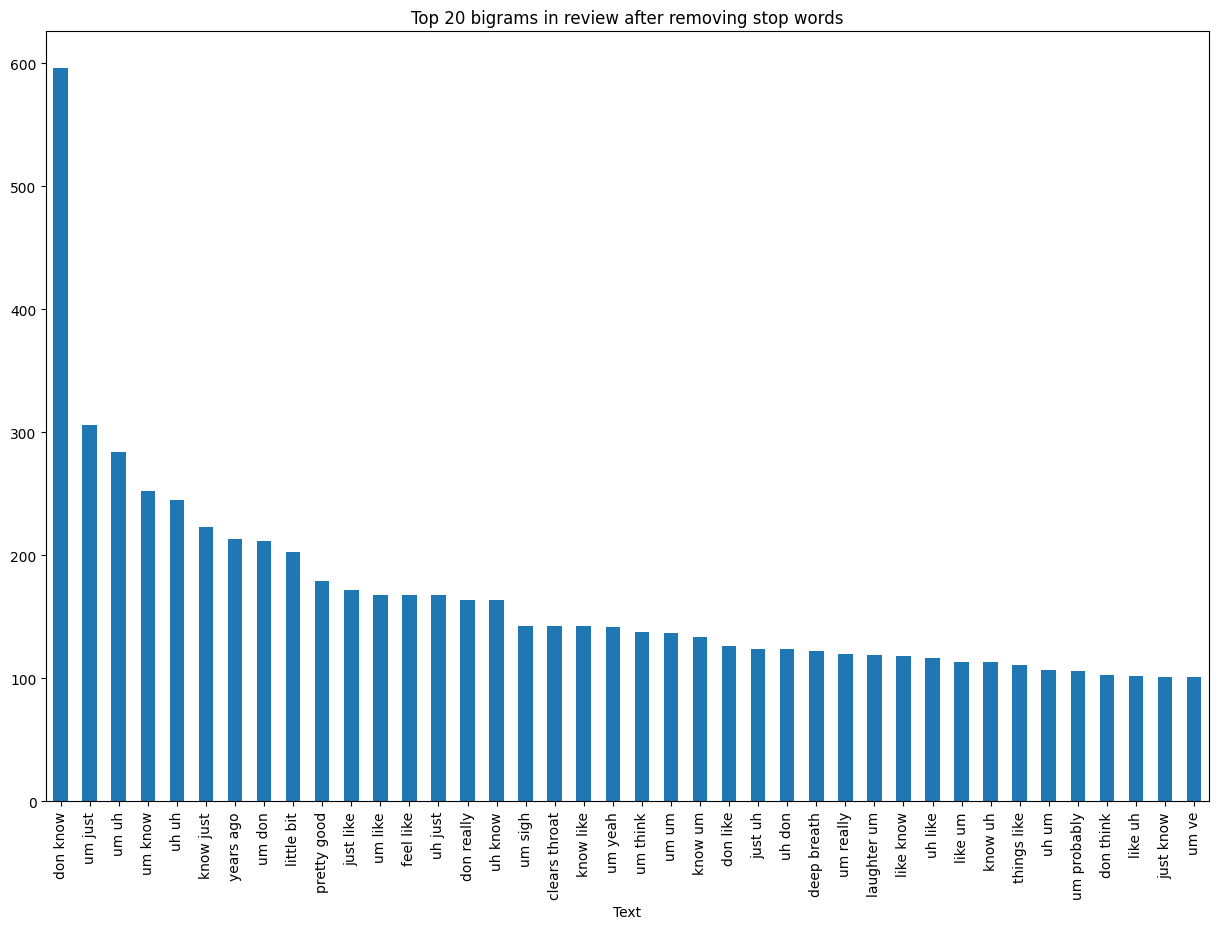

In [36]:
# The distribution of top bigrams

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(all_participants['answer'].dropna(), 40)

for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df4.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review after removing stop words',figsize = (15,10))

like l_a 306
really like 304
uh huh 274
hi ellie 185
ellie thanks 185
thanks coming 185
coming today 185
created talk 185
talk people 185
people safe 185
safe secure 185
secure environment 185
learn people 185
people love 185
love learn 185
ll ask 185
ask questions 185
questions started 185
feel free 185
free tell 185
tell answers 185
answers totally 185
totally confidential 185
doing today 185
time argued 183
time felt 183
felt really 183
really happy 183
okay think 183
asked need 183
thanks sharing 183
sharing thoughts 183
advice years 182
years ago 182
learn ll 179
controlling temper 178
tell time 178
therapist learn 176
easy good 174
good night 174


<Axes: title={'center': 'Top 20 bigrams in review after removing stop words'}, xlabel='Text'>

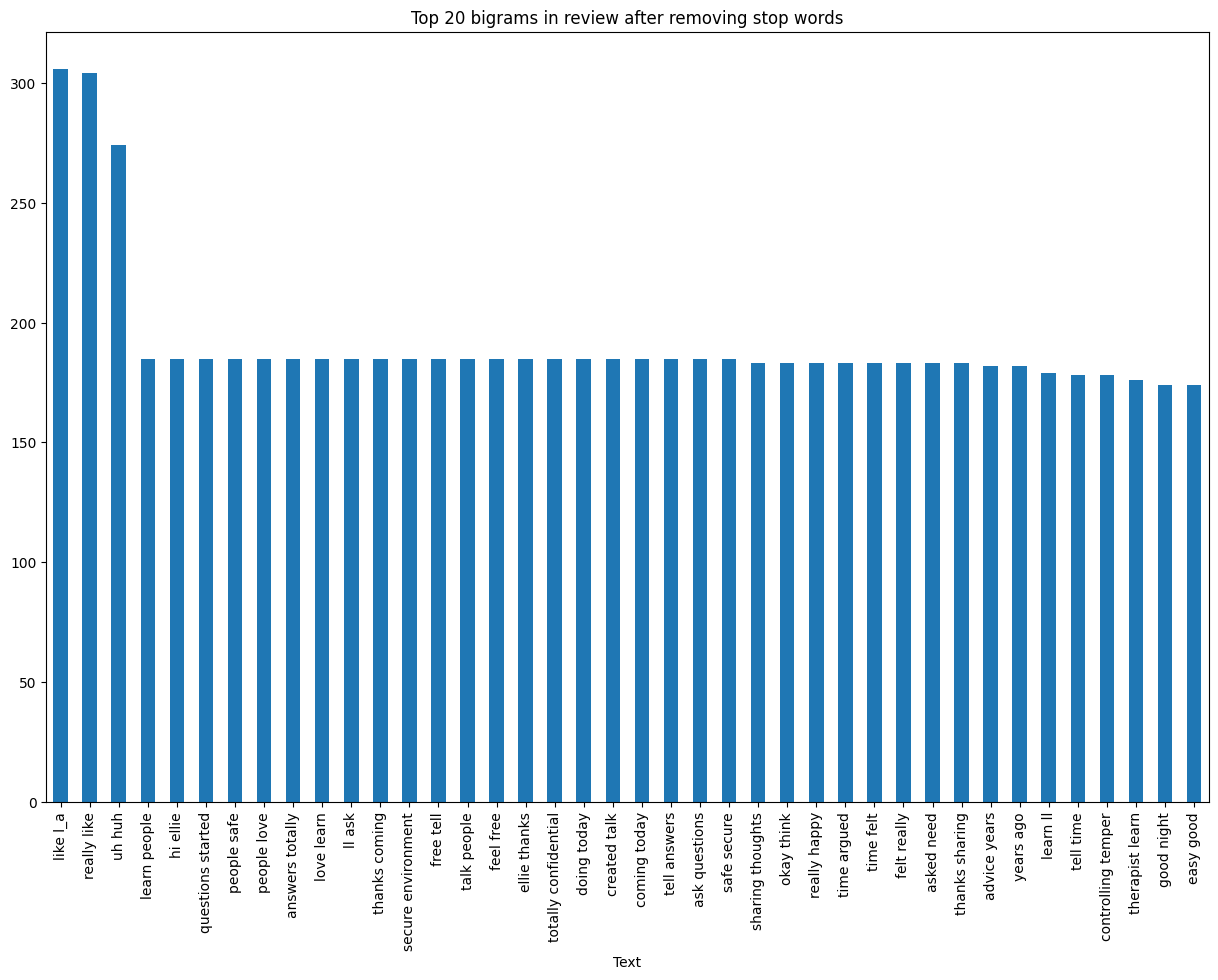

In [37]:
# The distribution of top bigrams

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(all_participants['question'].dropna(), 40)

for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df4.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review after removing stop words',figsize = (15,10))

### Trigram of the top 20  frequent words

um don know 106
uh don know 52
don know just 49
don know don 29
don know um 27
meeting new people 26
don know really 25
just don know 24
don know laughter 24
felt really happy 23
don know guess 23
deep breath um 23
time felt really 21
years ago um 21
um just uh 20
know don know 19
good night sleep 19
um years ago 18
deep breath sigh 18
um clears throat 18
decision ve make 17
hardest decision ve 17
really don know 17
don know uh 17
nan nan nan 17
good controlling temper 16
um yeah just 16
um know uh 16
just know just 16
um pretty good 16
uh just uh 16
laughter don know 16
los angeles california 16
uh uh uh 16
sigh don know 15
um don like 15
um know just 15
mm don know 15
long time ago 15
um uh uh 14


<Axes: title={'center': 'Top 20 trigrams in review after removing stop words'}, xlabel='Text'>

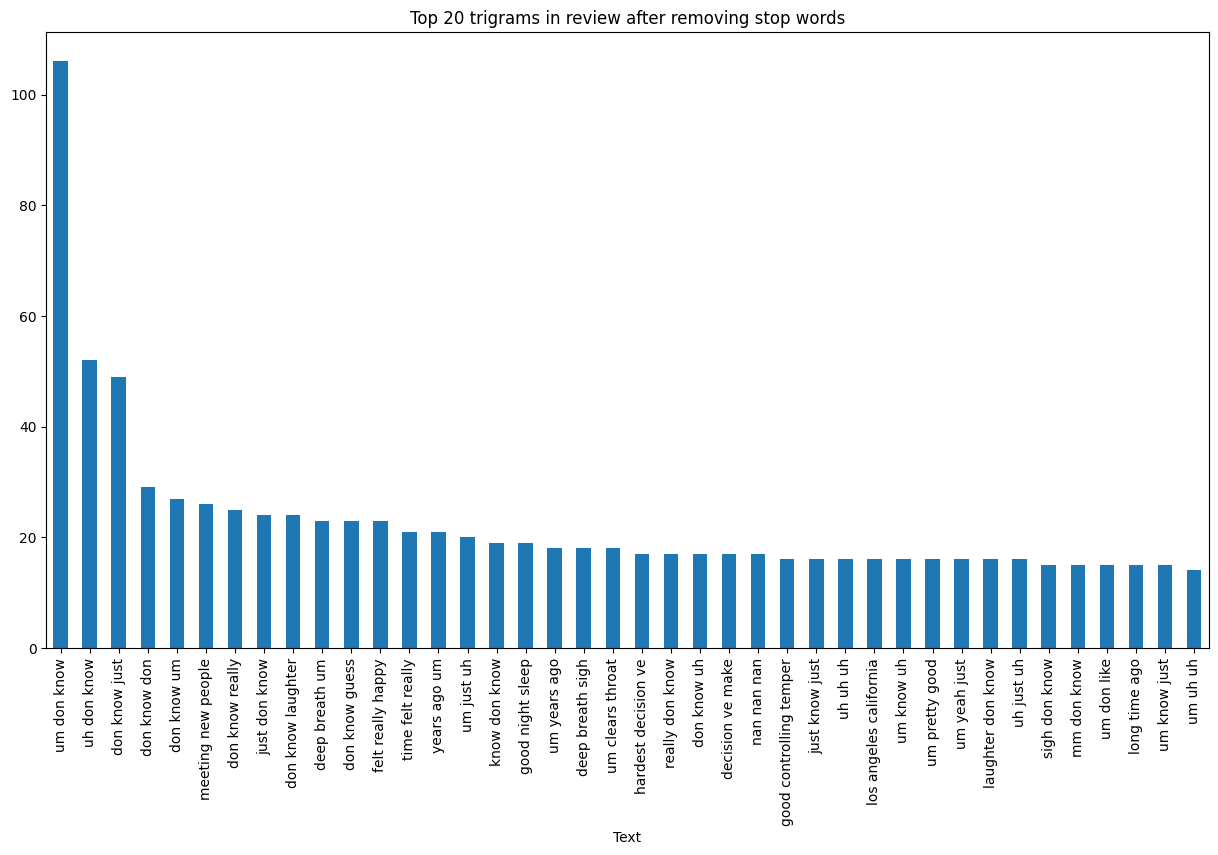

In [38]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(all_participants['answer'].dropna(), 40)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df6.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review after removing stop words',figsize=(15,8))

In [39]:
def load_avec_dataset_file(path,score_column):
    ds = pd.read_csv(path, sep=',')
    ds['level'] = pd.cut(ds[score_column], bins=[-1,9,25], labels=[0,1])  #cut function used to segregate array into bins 5 levels - 'none','mild','moderate','moderately severe', 'severe'
    ds['PHQ8_Score'] = ds[score_column]
    ds['cat_level'] = keras.utils.to_categorical(ds['level'], num_classes).tolist() #categorical levels
    ds = ds[['Participant_ID', 'level', 'cat_level', 'PHQ8_Score','Gender']]
    ds = ds.astype({"Participant_ID": float, "level": int, 'PHQ8_Score': int})
    return ds

In [40]:
train = load_avec_dataset_file('/content/drive/MyDrive/data/Label/train_split_Depression_AVEC2017.csv','PHQ8_Score')
dev = load_avec_dataset_file('/content/drive/MyDrive/data/Label/dev_split_Depression_AVEC2017.csv','PHQ8_Score')
test = load_avec_dataset_file('/content/drive/MyDrive/data/Label/full_test_split.csv','PHQ_Score')
print("Size: train= {}, dev= {}, test={}".format(len(train), len(dev), len(test)))
train.head()

Size: train= 107, dev= 35, test=47


,Participant_ID,level,cat_level,PHQ8_Score,Gender
0,303.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",0,0
1,304.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",6,0
2,305.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",7,1
3,310.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",4,1
4,312.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",2,1


In [41]:
train

,Participant_ID,level,cat_level,PHQ8_Score,Gender
0,303.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",0,0
1,304.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",6,0
2,305.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",7,1
3,310.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",4,1
4,312.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",2,1
...,...,...,...,...,...
102,485.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",2,1
103,486.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",4,0
104,487.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",0,0
105,488.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",0,0


### Participants with PHQ SCORES

In [42]:
## Import data visualization packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
ds_total = pd.concat([dev,train,test])
total_phq8 = len(ds_total)
print("Total size = {}".format(total_phq8))

Total size = 189


### Number of Participants with differnt PHQ Scores

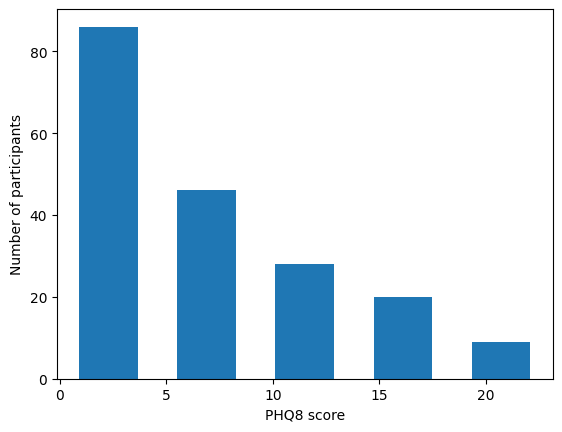

<Figure size 640x480 with 0 Axes>

In [44]:
bins=[-1,9,25]
plt.figure()
plt.hist(ds_total["PHQ8_Score"], rwidth=0.6, bins=5)
plt.xlabel('PHQ8 score')
plt.ylabel('Number of participants')
plt.show()
plt.savefig('/content/drive/My Drive/data/Label/bins.png')

### Gender distribution for differnt levels of depression


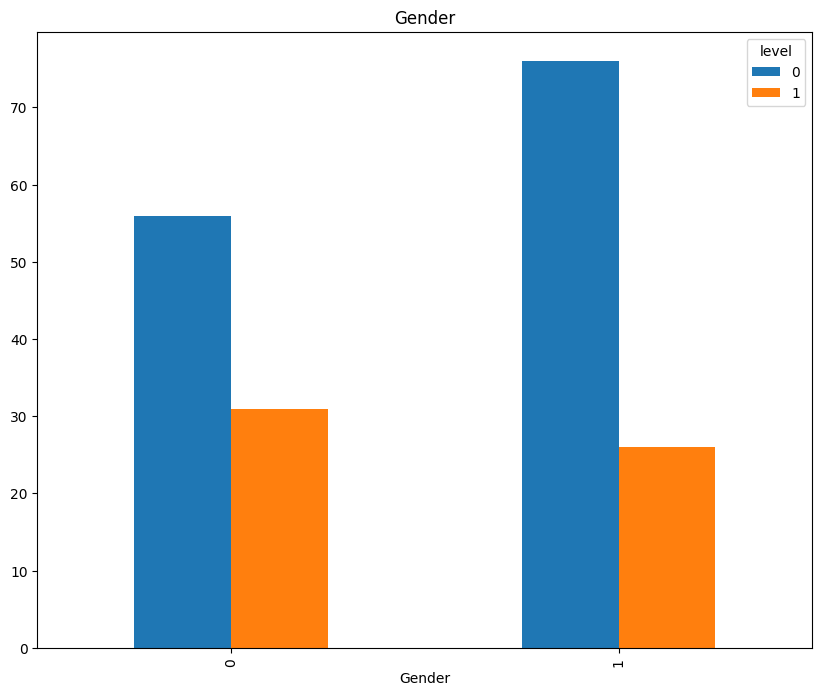

In [45]:
pd.crosstab(ds_total.Gender, ds_total.level).plot(kind="bar", figsize=(10, 8), title="Gender");
plt.plot();

In [46]:
# transcript_time = pd.read_csv('/content/drive/My Drive/time.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/time.csv'

In [47]:
def load_avec_dataset_file(path,score_column,NoInterest,Depressed,Sleep,Tired,Appetite,Failure,Concentrating,Moving):
    ds = pd.read_csv(path, sep=',')
    ds['level'] = pd.cut(ds[score_column], bins=[-1,9,25], labels=[0,1])  #cut function used to segregate array into bins 5 levels - 'none','mild','moderate','moderately severe', 'severe'
    ds['PHQ8_Score'] = ds[score_column]
    ds['PHQ8_NoInterest'] = ds[NoInterest]
    ds['PHQ8_Depressed'] = ds[Depressed]
    ds['PHQ8_Sleep'] = ds[Sleep]
    ds['PHQ8_Tired'] = ds[Tired]
    ds['PHQ8_Appetite'] = ds[Appetite]
    ds['PHQ8_Failure'] = ds[Failure]
    ds['PHQ8_Concentrating'] = ds[Concentrating]
    ds['PHQ8_Moving'] = ds[Moving]
    ds['cat_level'] = keras.utils.to_categorical(ds['level'], num_classes).tolist() #categorical levels
    ds = ds[['Participant_ID', 'level', 'cat_level', 'PHQ8_Score','Gender','PHQ8_NoInterest','PHQ8_Depressed','PHQ8_Sleep','PHQ8_Tired','PHQ8_Appetite','PHQ8_Failure','PHQ8_Concentrating','PHQ8_Moving']]
    ds = ds.astype({"Participant_ID": float, "level": int, 'PHQ8_Score': int})
    return ds

In [48]:
train = load_avec_dataset_file('/content/drive/MyDrive/data/Label/train_split_Depression_AVEC2017.csv','PHQ8_Score','PHQ8_NoInterest','PHQ8_Depressed','PHQ8_Sleep','PHQ8_Tired','PHQ8_Appetite','PHQ8_Failure','PHQ8_Concentrating','PHQ8_Moving')
dev = load_avec_dataset_file('/content/drive/MyDrive/data/Label/dev_split_Depression_AVEC2017.csv','PHQ8_Score','PHQ8_NoInterest','PHQ8_Depressed','PHQ8_Sleep','PHQ8_Tired','PHQ8_Appetite','PHQ8_Failure','PHQ8_Concentrating','PHQ8_Moving')
# test = load_avec_dataset_file('/content/drive/MyDrive/data/Label/full_test_split.csv','PHQ_Score')
print("Size: train= {}, dev= {}, test={}".format(len(train), len(dev), len(test)))
train.head()

Size: train= 107, dev= 35, test=47


,Participant_ID,level,cat_level,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,303.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",0,0,0,0,0.0,0,0,0,0,0
1,304.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",6,0,0,1,1.0,2,2,0,0,0
2,305.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",7,1,0,1,1.0,2,2,1,0,0
3,310.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",4,1,1,1,0.0,0,0,1,1,0
4,312.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",2,1,0,0,1.0,1,0,0,0,0


In [49]:
ds_total_devtrain = pd.concat([dev,train])
total_phq8_all = len(ds_total_devtrain)
print("Total size = {}".format(total_phq8_all))

Total size = 142


In [50]:
ds_total_devtrain

,Participant_ID,level,cat_level,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,302.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",4,1,1,1,0.0,1,0,1,0,0
1,307.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",4,0,0,1,0.0,1,0,2,0,0
2,331.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",8,1,1,1,1.0,1,1,1,1,1
3,335.0,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",12,0,1,1,3.0,2,3,1,1,0
4,346.0,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",23,0,2,3,3.0,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,485.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",2,1,0,1,0.0,0,0,0,0,1
103,486.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",4,0,1,1,0.0,1,0,1,0,0
104,487.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",0,0,0,0,0.0,0,0,0,0,0
105,488.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",0,0,0,0,0.0,0,0,0,0,0


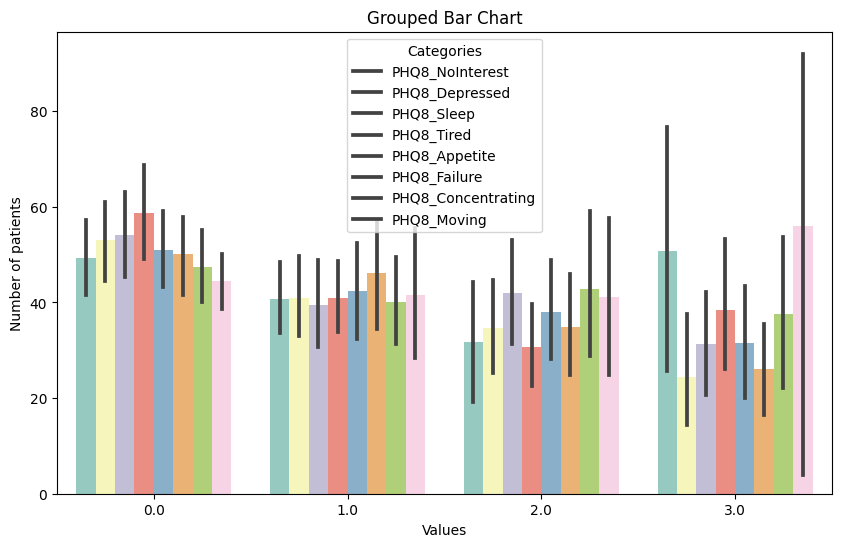

Number of patients for each category:
PHQ8_NoInterest       142
PHQ8_Depressed        142
PHQ8_Sleep            141
PHQ8_Tired            142
PHQ8_Appetite         142
PHQ8_Failure          142
PHQ8_Concentrating    142
PHQ8_Moving           142
dtype: int64


In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ds_total_devtrain is your DataFrame
columns_to_plot = ['PHQ8_NoInterest','PHQ8_Depressed','PHQ8_Sleep','PHQ8_Tired','PHQ8_Appetite','PHQ8_Failure','PHQ8_Concentrating','PHQ8_Moving']

# Count number of patients for each category
num_patients = ds_total_devtrain[columns_to_plot].count()

# Reset the index before melting
ds_total_devtrain_reset = ds_total_devtrain.reset_index()

# Melt the DataFrame for better compatibility with Seaborn
melted_df = ds_total_devtrain_reset.melt(id_vars='index', value_vars=columns_to_plot)

plt.figure(figsize=(10, 6))

sns.barplot(x='value', y='index', hue='variable', data=melted_df, palette='Set3')

plt.xlabel('Values')
plt.ylabel('Number of patients')
plt.title('Grouped Bar Chart')
plt.legend(title='Categories', labels=columns_to_plot)
plt.show()

# Display the count of patients for each category
print("Number of patients for each category:")
print(num_patients)


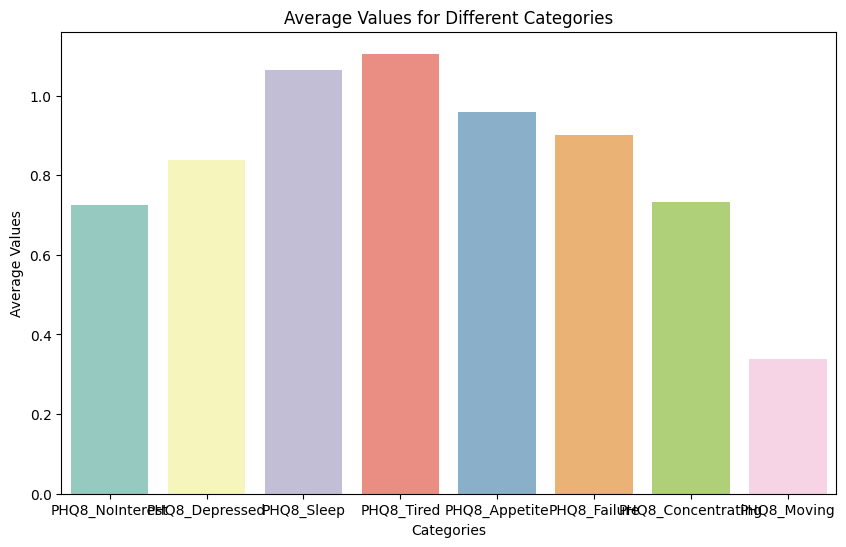

Average values for each category:
PHQ8_NoInterest       0.725352
PHQ8_Depressed        0.838028
PHQ8_Sleep            1.063830
PHQ8_Tired            1.105634
PHQ8_Appetite         0.957746
PHQ8_Failure          0.901408
PHQ8_Concentrating    0.732394
PHQ8_Moving           0.338028
dtype: float64


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ds_total_devtrain is your DataFrame
columns_to_plot = ['PHQ8_NoInterest', 'PHQ8_Depressed', 'PHQ8_Sleep', 'PHQ8_Tired', 'PHQ8_Appetite', 'PHQ8_Failure', 'PHQ8_Concentrating', 'PHQ8_Moving']

# Calculate the mean values for each column
average_values = ds_total_devtrain[columns_to_plot].mean()

# Create a bar plot for average values
plt.figure(figsize=(10, 6))
sns.barplot(x=average_values.index, y=average_values.values, palette='Set3')

plt.xlabel('Categories')
plt.ylabel('Average Values')
plt.title('Average Values for Different Categories')
plt.show()

# Display the average values for each category
print("Average values for each category:")
print(average_values)


In [3]:
import os
import re
import pandas as pd
from scipy.io import wavfile

def audio_to_dataframe(directory):
    rows_list = []

    folders = [f for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]

    for folder in folders:
        folder_path = os.path.join(directory, folder)
        filenames = [f for f in os.listdir(folder_path) if f.lower().endswith('.wav')]

        if ".DS_Store" in filenames:
            filenames.remove(".DS_Store")

        for filename in filenames:
            audio_path = os.path.join(folder_path, filename)
            m = re.search("(\d{3})_AUDIO.wav", filename)

            if m:
                person_id = m.group(1)
                p = {}
                p["personId"] = person_id

                # Using scipy's wavfile to read the audio file
                sample_rate, samples = wavfile.read(audio_path)
                p["audio_samples"] = samples
                p["sample_rate"] = sample_rate

                rows_list.append(p)

    all_participants = pd.DataFrame(rows_list, columns=['personId', 'audio_samples', 'sample_rate'])
    all_participants.to_csv(os.path.join(directory, 'all_audio.csv'), sep=',', index=False)
    print("Audio file information was created")
    return all_participants

# Example usage
audio_directory = "/content/drive/My Drive/data/"
audio_df = audio_to_dataframe(audio_directory)

<ipython-input-3-b50a018ce81b>:28: WavFileWarning: Reached EOF prematurely; finished at 32752044 bytes, expected 262016044 bytes from header.
  sample_rate, samples = wavfile.read(audio_path)
<ipython-input-3-b50a018ce81b>:28: WavFileWarning: Reached EOF prematurely; finished at 19286444 bytes, expected 154291244 bytes from header.
  sample_rate, samples = wavfile.read(audio_path)
<ipython-input-3-b50a018ce81b>:28: WavFileWarning: Reached EOF prematurely; finished at 28214444 bytes, expected 225715244 bytes from header.
  sample_rate, samples = wavfile.read(audio_path)
<ipython-input-3-b50a018ce81b>:28: WavFileWarning: Reached EOF prematurely; finished at 29200044 bytes, expected 233600044 bytes from header.
  sample_rate, samples = wavfile.read(audio_path)
<ipython-input-3-b50a018ce81b>:28: WavFileWarning: Reached EOF prematurely; finished at 50464044 bytes, expected 403712044 bytes from header.
  sample_rate, samples = wavfile.read(audio_path)
<ipython-input-3-b50a018ce81b>:28: WavFi

Audio file information was created


In [4]:
audio_df

,personId,audio_samples,sample_rate
0,487,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",16000
1,488,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",16000
2,485,"[27, 24, 24, 25, 24, 26, 30, 30, 30, 31, 29, 3...",16000
3,491,"[-79, -77, -77, -80, -79, -78, -79, -79, -77, ...",16000
4,492,"[-17, -16, -15, -15, -16, -16, -17, -18, -14, ...",16000
...,...,...,...
183,301,"[-96, -115, -134, -81, -32, 13, 109, 126, 77, ...",16000
184,305,"[-175, -223, -307, -346, -347, -308, -329, -32...",16000
185,302,"[-11, 0, -6, -14, -28, -32, -24, -11, -1, -14,...",16000
186,306,"[-60, -77, -56, -44, -23, 21, 78, 122, 195, 25...",16000


In [5]:
import librosa

# Load the audio file
AUDIO_FILE = '/content/drive/My Drive/data/424_P/424_AUDIO.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

In [60]:
from scipy.io import wavfile
sample_rate, samples = wavfile.read(AUDIO_FILE)

In [61]:
sample_rate

16000

In [63]:
samples

array([ 18,  16,  16, ...,   0, 114,  48], dtype=int16)

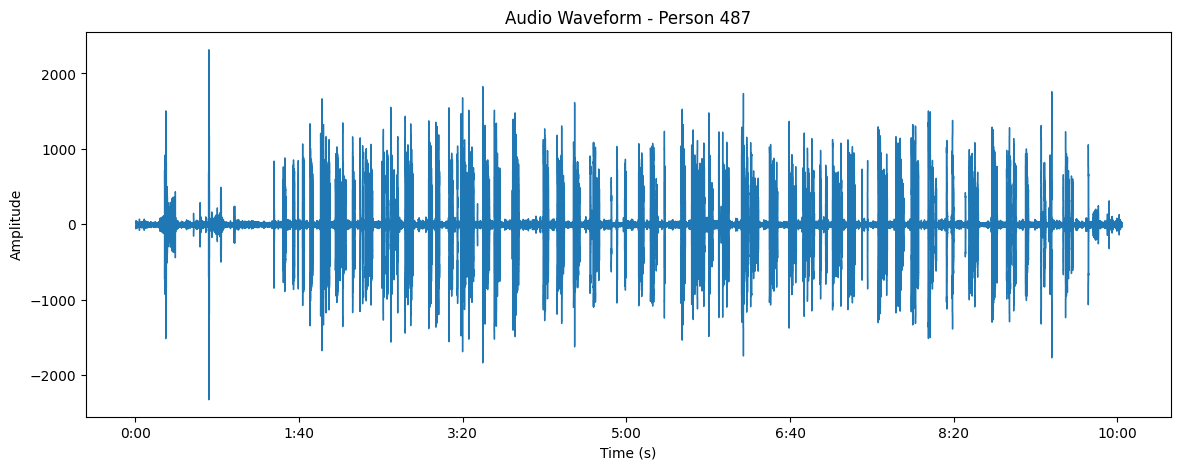

In [6]:
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Ensure audio samples are in floating-point format
audio_samples = audio_df['audio_samples'].iloc[2].astype(float)
sample_rate = audio_df['sample_rate'].iloc[2]

librosa.display.waveshow(audio_samples, sr=sample_rate)
plt.title(f"Audio Waveform - Person {audio_df['personId'].iloc[0]}")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

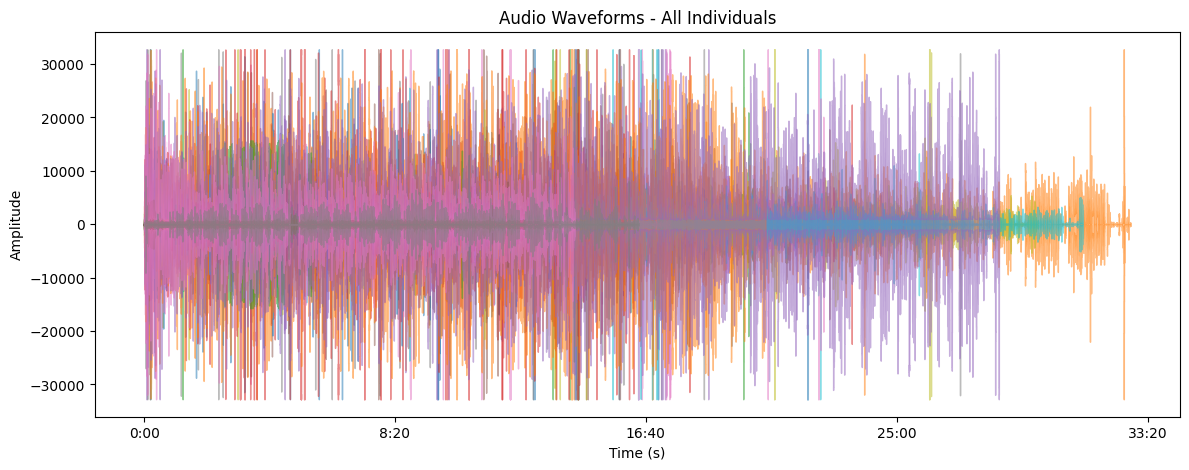

In [72]:
import librosa.display
import matplotlib.pyplot as plt

# Plot waveforms for all individuals
plt.figure(figsize=(14, 5))

for index, row in audio_df.iterrows():
    # Ensure audio samples are in floating-point format
    audio_samples = row['audio_samples'].astype(float)
    sample_rate = row['sample_rate']

    # Plot the waveform
    librosa.display.waveshow(audio_samples, sr=sample_rate, alpha=0.5)

plt.title("Audio Waveforms - All Individuals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
## This code have to use a lot ram
import numpy as np
# Plot spectrograms for all individuals
plt.figure(figsize=(14, 5))

for index, row in audio_df.iterrows():
    # Ensure audio samples are in floating-point format
    audio_samples = row['audio_samples'].astype(float)
    sample_rate = row['sample_rate']

    # Compute the spectrogram
    sgram = librosa.stft(audio_samples)
    sgram_db = librosa.amplitude_to_db(np.abs(sgram), ref=np.max)

    # Plot the spectrogram
    librosa.display.specshow(sgram_db, sr=sample_rate, x_axis='time', y_axis='log', cmap='viridis', alpha=0.5)

plt.title("Spectrograms - All Individuals")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(format="%+2.0f dB")
plt.show()

<ipython-input-3-a6ac540eaad9>:7: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(sgram)


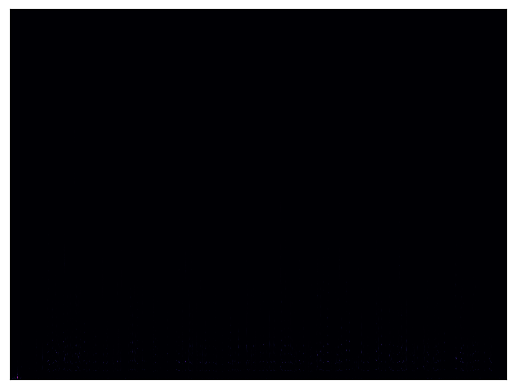

In [3]:
import librosa.display
import matplotlib.pyplot as plt

# Ensure audio samples are in floating-point format
audio_samples = audio_df['audio_samples'].iloc[0].astype(float)
sample_rate = audio_df['sample_rate'].iloc[0]
sgram = librosa.stft(audio_samples)
librosa.display.specshow(sgram)

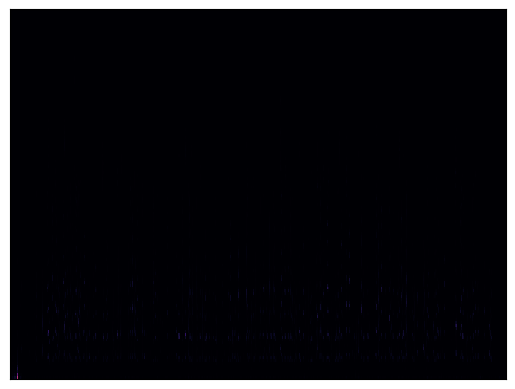

In [6]:
# use the mel-scale instead of raw frequency
sample_rate = audio_df['sample_rate'].iloc[0]
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

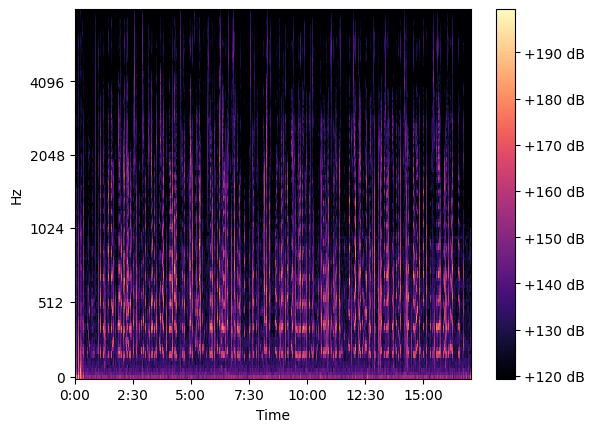

In [8]:
import numpy as np
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [12]:
import librosa
for index, row in audio_df.iterrows():
    # Ensure audio samples are in floating-point format
    audio_samples = row['audio_samples']
    sample_rate = row['sample_rate']

    # Calculate the duration
    duration = librosa.get_duration(y=audio_samples, sr=sample_rate)

    print(f"The duration of the audio file for person {row['personId']} is {duration:.2f} seconds.")

The duration of the audio file for person 487 is 1023.50 seconds.
The duration of the audio file for person 488 is 884.90 seconds.
The duration of the audio file for person 485 is 602.70 seconds.
The duration of the audio file for person 491 is 881.70 seconds.
The duration of the audio file for person 492 is 912.50 seconds.
The duration of the audio file for person 483 is 1577.00 seconds.
The duration of the audio file for person 486 is 682.30 seconds.
The duration of the audio file for person 489 is 704.70 seconds.
The duration of the audio file for person 484 is 995.50 seconds.
The duration of the audio file for person 490 is 691.30 seconds.
The duration of the audio file for person 477 is 1244.70 seconds.
The duration of the audio file for person 475 is 587.20 seconds.
The duration of the audio file for person 473 is 533.30 seconds.
The duration of the audio file for person 474 is 927.40 seconds.
The duration of the audio file for person 480 is 865.70 seconds.
The duration of the au

In [10]:
audio_samples

array([-101.,  -98.,  -96., ...,   61.,   57.,   66.])

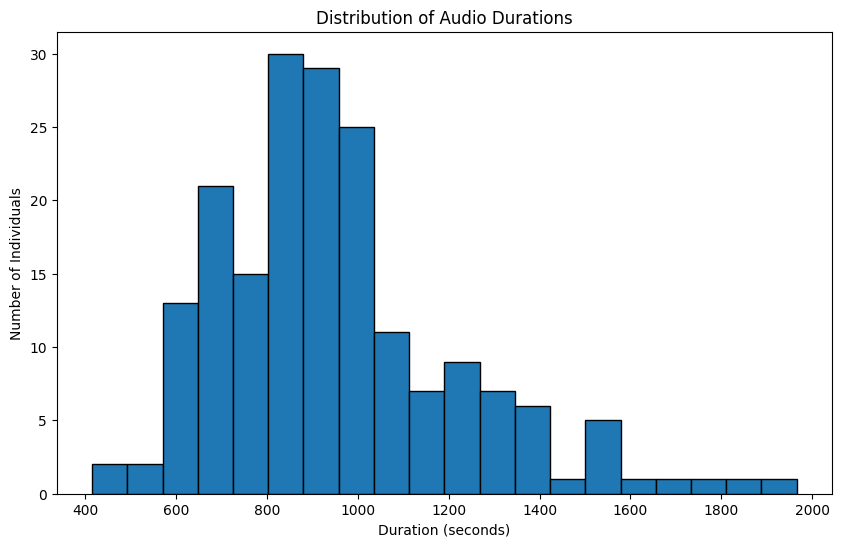

In [14]:
import matplotlib.pyplot as plt

# Calculate durations for all individuals
durations = []

for index, row in audio_df.iterrows():
    audio_samples = row['audio_samples']
    sample_rate = row['sample_rate']
    duration = librosa.get_duration(y=audio_samples, sr=sample_rate)
    durations.append(duration)

# Plot the distribution of durations
plt.figure(figsize=(10, 6))
plt.hist(durations, bins=20, edgecolor='black')
plt.title("Distribution of Audio Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Number of Individuals")
plt.show()